In [1]:
import matplotlib.pyplot as plt
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
import torch
import torch.nn as nn
from torch.optim.adam import Adam

In [2]:
train_data = MNIST(root='./',train=True,download=True,transform=ToTensor())
test_data = MNIST(root='./',train=False,download=True,transform=ToTensor())

100%|██████████| 9.91M/9.91M [00:03<00:00, 2.61MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 140kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 660kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.20MB/s]


In [3]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [4]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

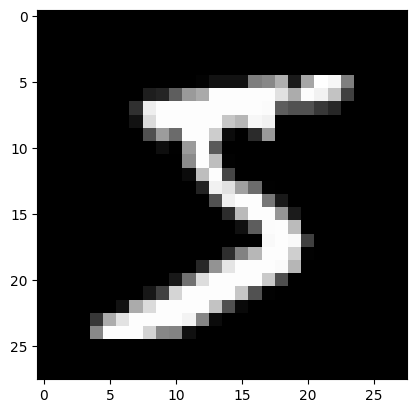

tensor(5)


In [5]:
plt.imshow(train_data.data[0],cmap='gray')
plt.show()
print(train_data.targets[0])

In [6]:
train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test_data,batch_size=32,shuffle=False)

In [10]:
next(iter(train_loader))[0].shape

torch.Size([32, 1, 28, 28])

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [12]:
model = nn.Sequential(
    nn.Linear(784,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,10)
)

model.to(device)
model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
from tensorboardX import SummaryWriter
writer = SummaryWriter()

lr = 1e-3
optim = Adam(model.parameters(),lr=lr)

global_step = 0
for epoch in range(20):
    for data,label in train_loader:
        optim.zero_grad()
        data = torch.reshape(data,(-1,784))
        pred = model(data.to(device))
        loss = nn.CrossEntropyLoss()(pred,label.to(device))
        writer.add_scalar('Loss/train', loss.item(), global_step)
        global_step += 1
        loss.backward()
        optim.step()
    print(f'{epoch+1} loss:{loss.item()}')

1 loss:0.05332941561937332
2 loss:0.015072776935994625
3 loss:0.025205163285136223
4 loss:0.08653847873210907
5 loss:0.1061551496386528
6 loss:0.00191042001824826
7 loss:0.05605652555823326
8 loss:0.03323384001851082
9 loss:0.005800995044410229
10 loss:0.05148344114422798
11 loss:0.00044513013563118875
12 loss:0.04252425208687782
13 loss:0.006297197192907333
14 loss:0.0033854704815894365
15 loss:0.058704763650894165
16 loss:0.0037130778655409813
17 loss:0.12889274954795837
18 loss:0.034091223031282425
19 loss:0.0008764785015955567
20 loss:0.03239811211824417


In [16]:
%load_ext tensorboard
%tensorboard --logdir runs --port 6006

ModuleNotFoundError: No module named 'tensorboard'

In [3]:
import torch
import torch.nn as nn

# 예시 모델: LeNet-5
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)      
        self.pool1 = nn.AvgPool2d(2, 2)                  
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)     
        self.pool2 = nn.AvgPool2d(2, 2)                  
        self.fc1 = nn.Linear(16*4*4, 120)                
        self.fc2 = nn.Linear(120, 84)                    
        self.fc3 = nn.Linear(84, 10)                     

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = torch.relu(self.fc1(x.view(-1, 16*4*4)))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 생성
model = LeNet5()

# 모든 파라미터 이름과 shape 출력
for name, param in model.named_parameters():
    print(f"{name:<20} {list(param.size())}")

conv1.weight         [6, 1, 5, 5]
conv1.bias           [6]
conv2.weight         [16, 6, 5, 5]
conv2.bias           [16]
fc1.weight           [120, 256]
fc1.bias             [120]
fc2.weight           [84, 120]
fc2.bias             [84]
fc3.weight           [10, 84]
fc3.bias             [10]


In [5]:
import pandas as pd
# 각 레이어별 파라미터 수 계산
param_data = []
for name, param in model.named_parameters():
    if param.requires_grad:
        param_data.append({
            "Layer": name,
            "Shape": list(param.shape),
            "Params": param.numel()
        })

df = pd.DataFrame(param_data)
df.loc["Total"] = ["", "", df["Params"].sum()]

print(df)

              Layer          Shape  Params
0      conv1.weight   [6, 1, 5, 5]     150
1        conv1.bias            [6]       6
2      conv2.weight  [16, 6, 5, 5]    2400
3        conv2.bias           [16]      16
4        fc1.weight     [120, 256]   30720
5          fc1.bias          [120]     120
6        fc2.weight      [84, 120]   10080
7          fc2.bias           [84]      84
8        fc3.weight       [10, 84]     840
9          fc3.bias           [10]      10
Total                                44426


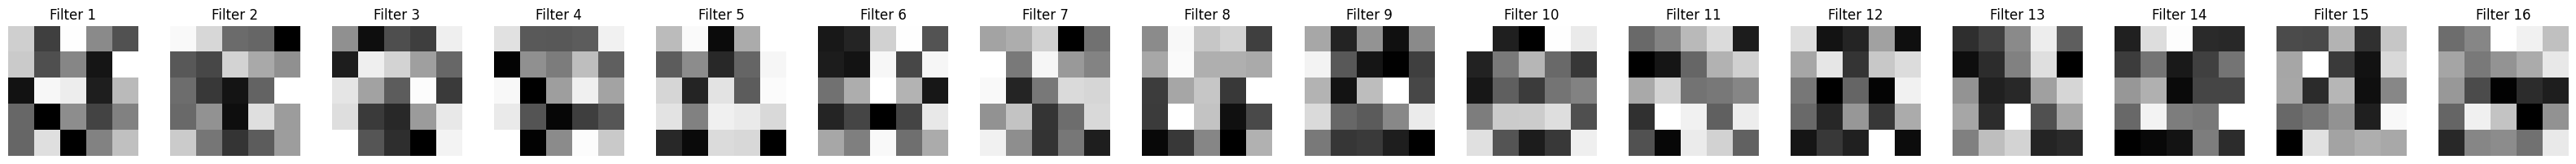

In [8]:
import matplotlib.pyplot as plt 

# 첫 번째 Conv 레이어의 weight 가져오기
weights = model.conv2.weight.data.clone()

# 시각화
num_filters = weights.shape[0]  # 출력 채널 수
fig, axes = plt.subplots(1, num_filters, figsize=(num_filters*2, 2))

for i in range(num_filters):
    ax = axes[i]
    # in_channels가 1이라면 squeeze로 2D로 변환
    filt = weights[i, 0, :, :].cpu().numpy()
    ax.imshow(filt, cmap="gray")
    ax.axis("off")
    ax.set_title(f"Filter {i+1}")

plt.tight_layout()
plt.show()